In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget

2023-05-05 16:46:26.514370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('train.csv')

In [3]:
y = df['label'].to_numpy()
X = df.iloc[:,1:].to_numpy()
print(f'x-shape: {X.shape}, y-shape: {y.shape}')

x-shape: (42000, 784), y-shape: (42000,)


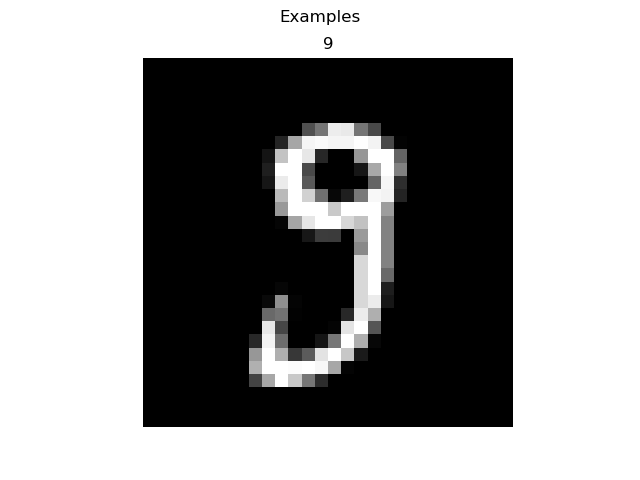

In [4]:
fig, ax = plt.subplots()

rando = 40
ax.imshow(X[rando].reshape(28,28), cmap='gray')
ax.set_axis_off()
ax.set_title(y[rando])
    
fig.suptitle('Examples')

plt.show()

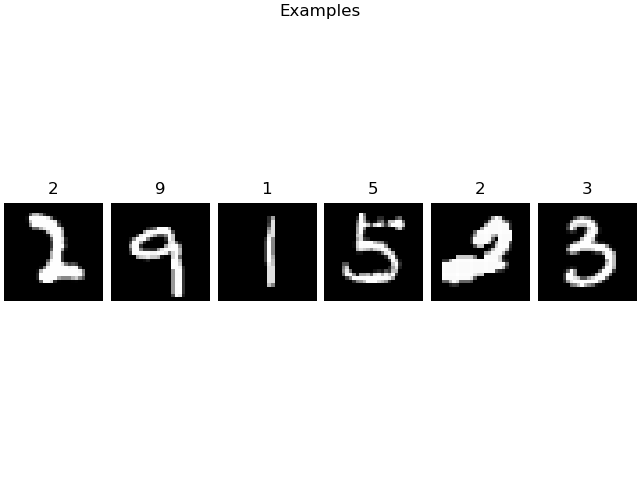

In [5]:
fig, ax = plt.subplots(1,6, constrained_layout=True)

for i in range(6):
    rando = np.random.randint(0,42000)
    ax[i].imshow(X[rando].reshape(28,28), cmap='gray')
    ax[i].set_axis_off()
    ax[i].set_title(y[rando])
    
fig.suptitle('Examples')

plt.show()

In [6]:
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=25, activation='relu', name='L1'),
        Dense(units=15, activation='relu', name='L2'),
        Dense(units=10, activation='linear', name='L3')
        
    ]
)

2023-05-05 16:46:30.874713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001,),
    metrics='accuracy'
)

model.fit(
    X,y,
    epochs=200
)

Epoch 1/200
1313/1313 [==============================] - 2s 989us/step - loss: 2.2232 - accuracy: 0.4023
Epoch 2/200
1313/1313 [==============================] - 1s 997us/step - loss: 1.0504 - accuracy: 0.6161
Epoch 3/200
1313/1313 [==============================] - 1s 1ms/step - loss: 0.8095 - accuracy: 0.6935
Epoch 4/200
1313/1313 [==============================] - 1s 974us/step - loss: 0.7394 - accuracy: 0.7169
Epoch 5/200
1313/1313 [==============================] - 1s 973us/step - loss: 0.6685 - accuracy: 0.7523
Epoch 6/200
1313/1313 [==============================] - 1s 974us/step - loss: 0.6096 - accuracy: 0.7771
Epoch 7/200
1313/1313 [==============================] - 1s 977us/step - loss: 0.5433 - accuracy: 0.8022
Epoch 8/200
1313/1313 [==============================] - 1s 972us/step - loss: 0.4919 - accuracy: 0.8145
Epoch 9/200
1313/1313 [==============================] - 1s 972us/step - loss: 0.4600 - accuracy: 0.8293
Epoch 10/200
1313/1313 [==============================] -

In [9]:
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

## Prediction:

Actual Value: 3
1/1 [==============================] - 0s 125ms/step
Predicted Value: 3


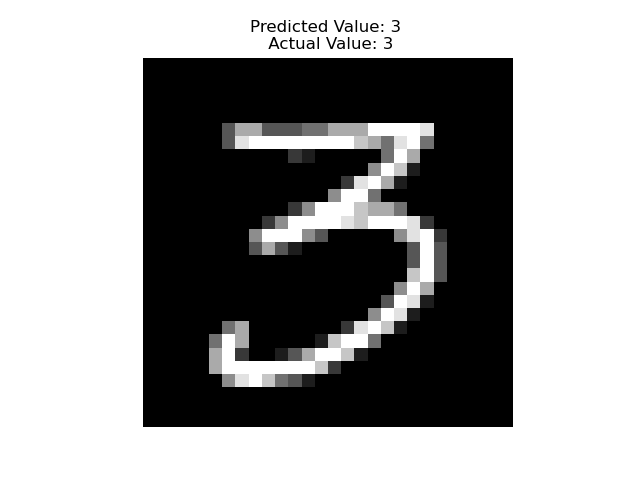

In [10]:
number = np.random.randint(0,42000)

print(f'Actual Value: {y[number]}')

prediction = model.predict(X[number].reshape(1,784))
print(f'Predicted Value: {np.argmax(prediction)}')

fig, ax = plt.subplots()

ax.imshow(X[number].reshape(28,28), cmap='gray')
ax.set_axis_off()
ax.set_title(f'Predicted Value: {np.argmax(prediction)} \n Actual Value: {y[number]}')

plt.show()

# Test

In [11]:
df_test = pd.read_csv('test.csv')
X_test = df_test.to_numpy()

In [12]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=X, y=y)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

1313/1313 [==============================] - 1s 735us/step - loss: 0.0684 - accuracy: 0.9796

Test accuracy: 0.9795714020729065


In [13]:
X_test.shape

(28000, 784)

In [14]:
prediction = model.predict(X_test)

875/875 [==============================] - 1s 649us/step


In [15]:
final_predict = pd.DataFrame({'ImageID':np.arange(1, (X_test.shape[0] + 1)),
             'Label':np.argmax(prediction, axis=1)}).set_index('ImageID')

In [16]:
final_predict.to_csv('/Users/jairusmartinez/Desktop/digit_prediction.csv', index=True)